<h1>Assignment one <h1>
 

import statement

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, Select
from IPython.display import display


Importing the csv file as a dataset

In [2]:
df= pd.read_csv('datasets\dataset.csv')

Displaying the dataset

In [3]:
df

,id,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,152396,2147303785,1,"""2019-12-12 06:41:37""",about-this-book,kopec2,792,337,1073,0
1,155271,2147303785,2,"""2019-12-13 03:20:23""",about-this-book,atencio,329,129,702,0
2,155365,2147303785,7,"""2019-12-13 04:29:29""",about-this-book,nickoloff2,1985,552,902,0
3,155788,2147303785,2,"""2019-12-13 08:43:29""",about-the-authors,nickoloff2,1985,552,902,0
4,157625,2147303785,1,"""2019-12-13 23:42:05""",chapter-1,nickoloff2,1985,552,902,0
...,...,...,...,...,...,...,...,...,...,...
9994,26059,1890093722,6,"""2019-10-27 15:52:53""",chapter-3,clinton3,598,157,920,1
9995,26075,1890093722,1,"""2019-10-27 16:02:50""",chapter-6,clinton3,598,157,920,1
9996,26076,1890093722,1,"""2019-10-27 16:03:20""",chapter-6,clinton3,598,157,920,1
9997,26104,1890093722,9,"""2019-10-27 16:26:34""",chapter-12,clinton3,598,157,920,1


Creating the edgelist, first by sorting by user_id and date created.

In [4]:
df=df.sort_values(by=['user_id','date_created'])


Then set the book and chapter combined column to equal the source column (Key addition for this assignment compared to the worked example). 

In [5]:
df["book_chapter"] = df["chapter"].astype(str) + df["book"].astype(str)
df["source"]=df["book_chapter"]

Shift columns up to create target and user check

In [6]:
df["target"]= df["source"].shift(-1)  
df["user_check"]= df["user_id"].shift(-1)

Drop rows where the user_id is not equal to the id_check

In [7]:
df['keep_drop'] = np.where((df['user_check'] == df['user_id'])
                     , df['user_id'], np.nan)

In [8]:
df=df.dropna(subset=["keep_drop"])

Create and draw the network from the edgelist

In [9]:
G=nx.from_pandas_edgelist(df,"source",'target', create_using=nx.DiGraph)

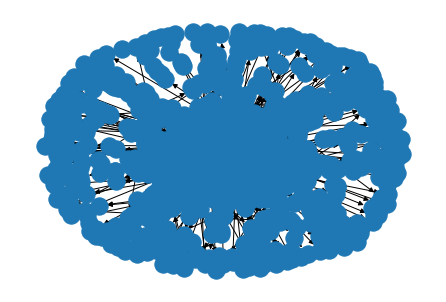

In [10]:
nx.draw(G)


In [12]:
df.to_csv('data_for_gephi.csv')